## EDA Analysis: 
#### How have income and cost of living trends in the U.S. compared to other global regions (e.g., Europe, South America) over time, and what patterns emerge in relation to Americans’ consumer spending?

- What economic regions closely mirror the U.S?
- Can we assume that there is a relationship between this and American Consumer spending?
- Are there some things we should be considering outside of our found data?

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [26]:
# Load both datasets
us_econ = pd.read_csv("../data/US_Macro_Micro_Index.csv")
world_col = pd.read_csv("../data/Cost_of_Living_and_Income_Extended.csv")

In [ ]:
# First five rows of the US economic data (Macro_Micro_Index.csv)
us_econ.head()

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


In [ ]:
# First five rows of Cost of Living and Income data Globally (Cost_of_Living_and_Income_Extended.csv)
world_col.head()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America


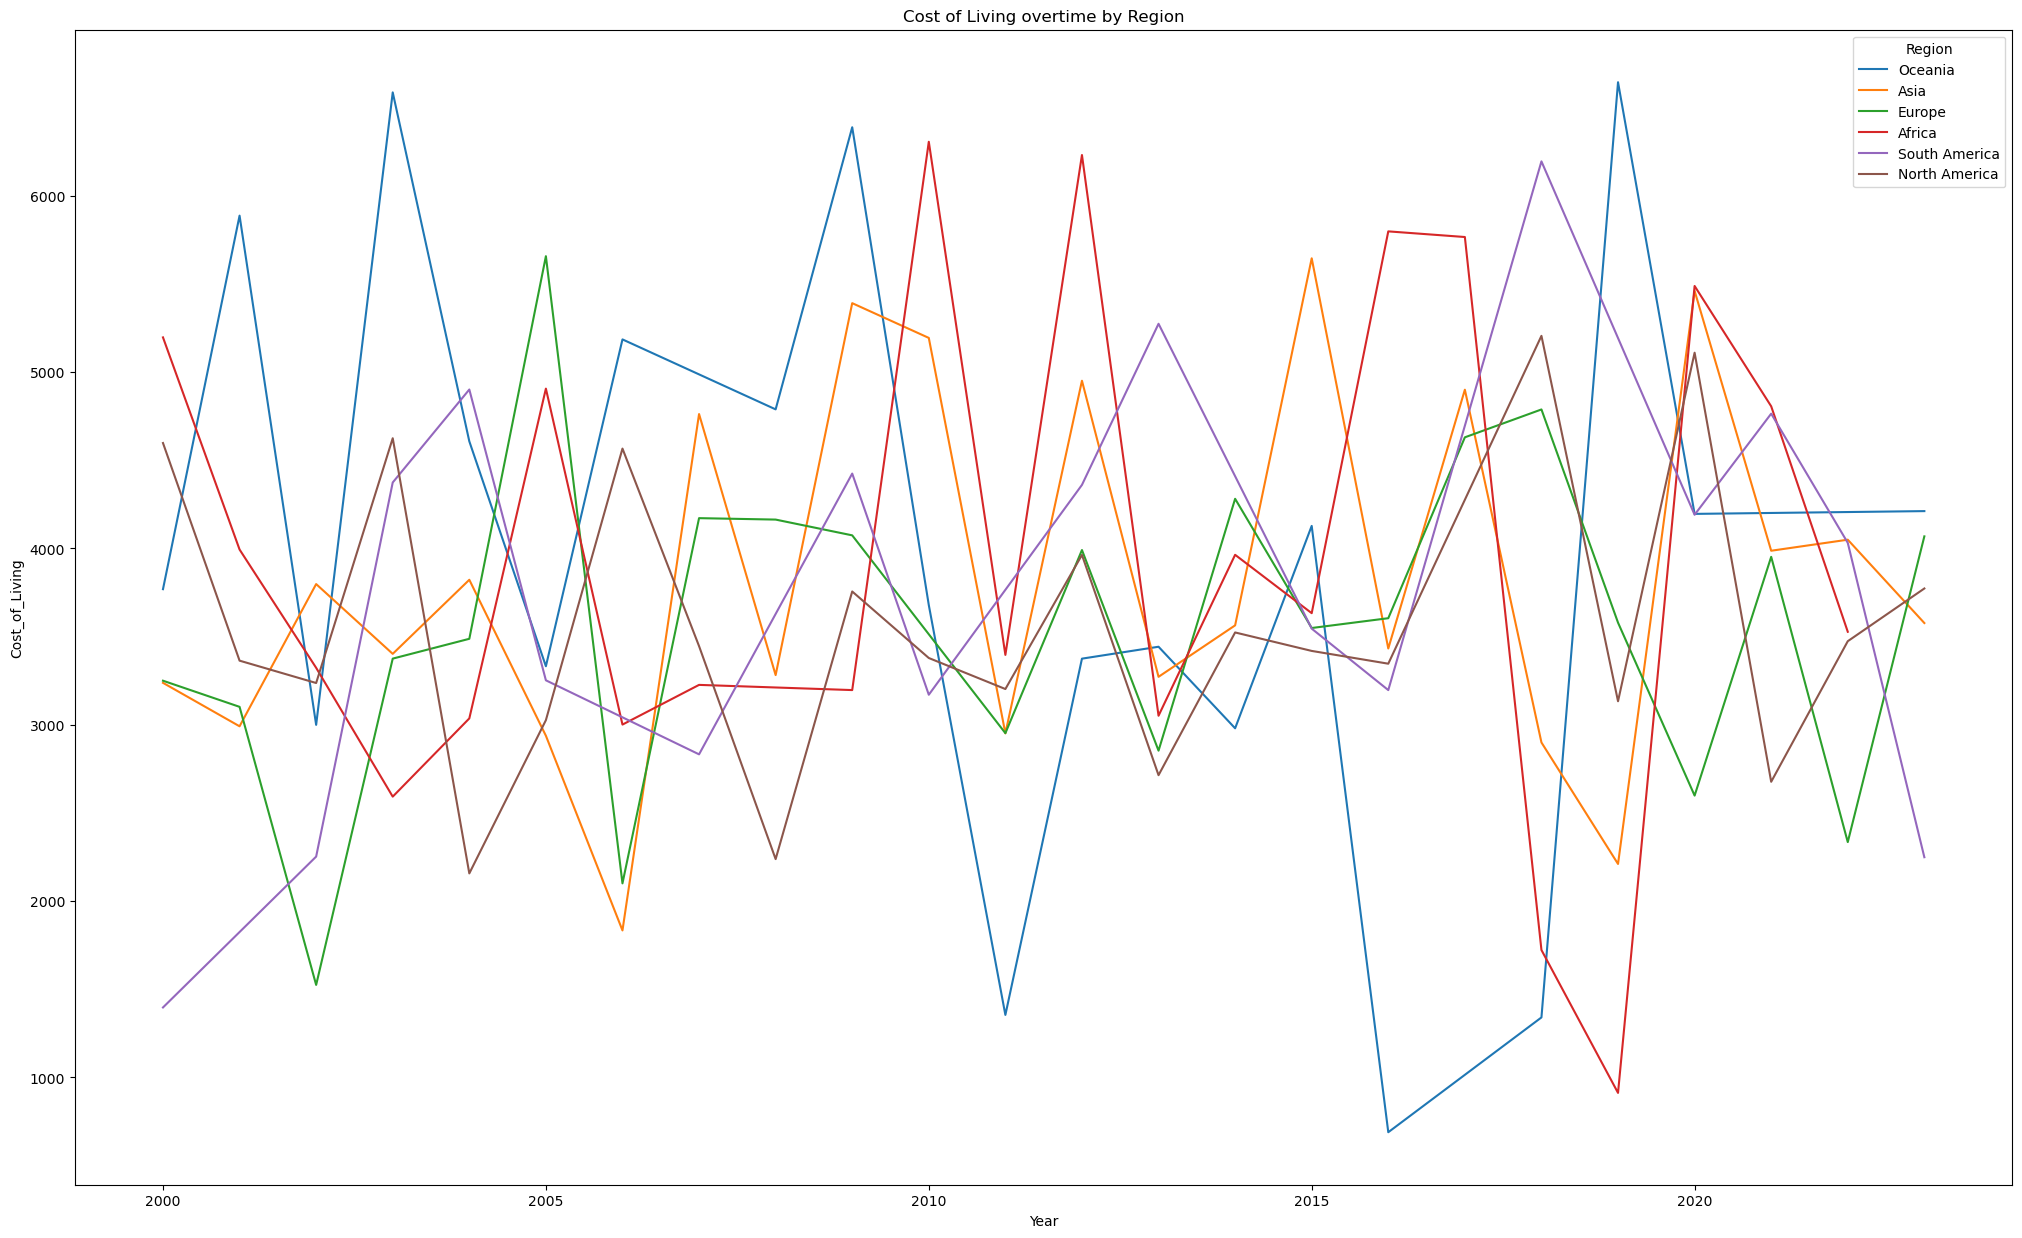

In [37]:
# Line plot of Cost of Living over time in different regions
plt.figure(figsize=(25, 15))
sns.lineplot(data=world_col, x="Year", y="Cost_of_Living", hue="Region", errorbar=None)         # Oceania is Australia
plt.title("Cost of Living overtime by Region")
plt.show()
plt.close()

##### Now that we have a reigonal view lets look at North America:

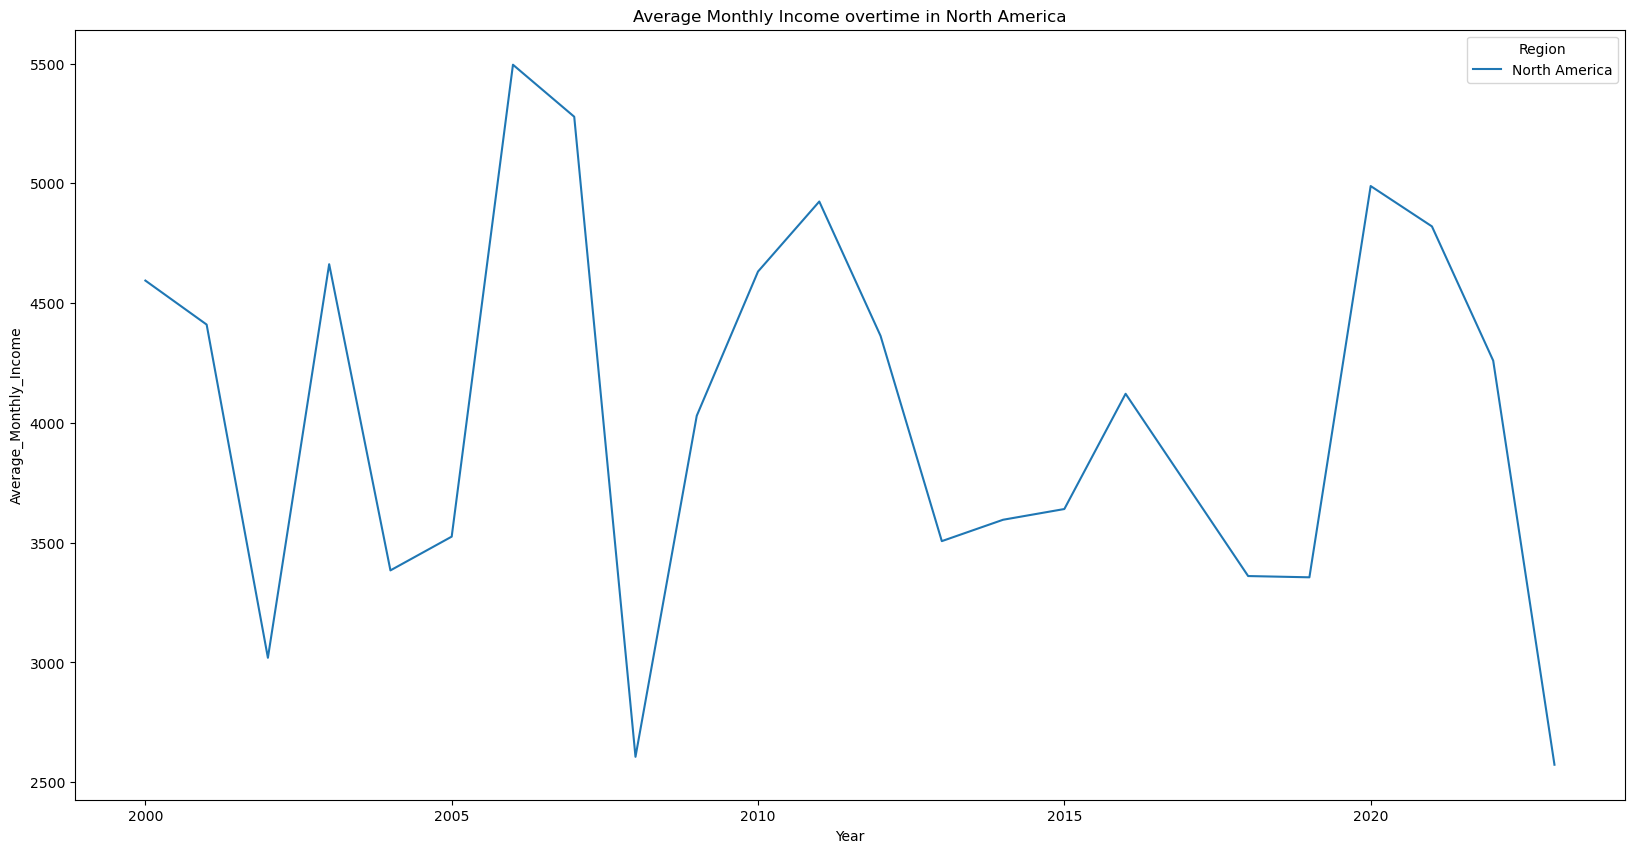

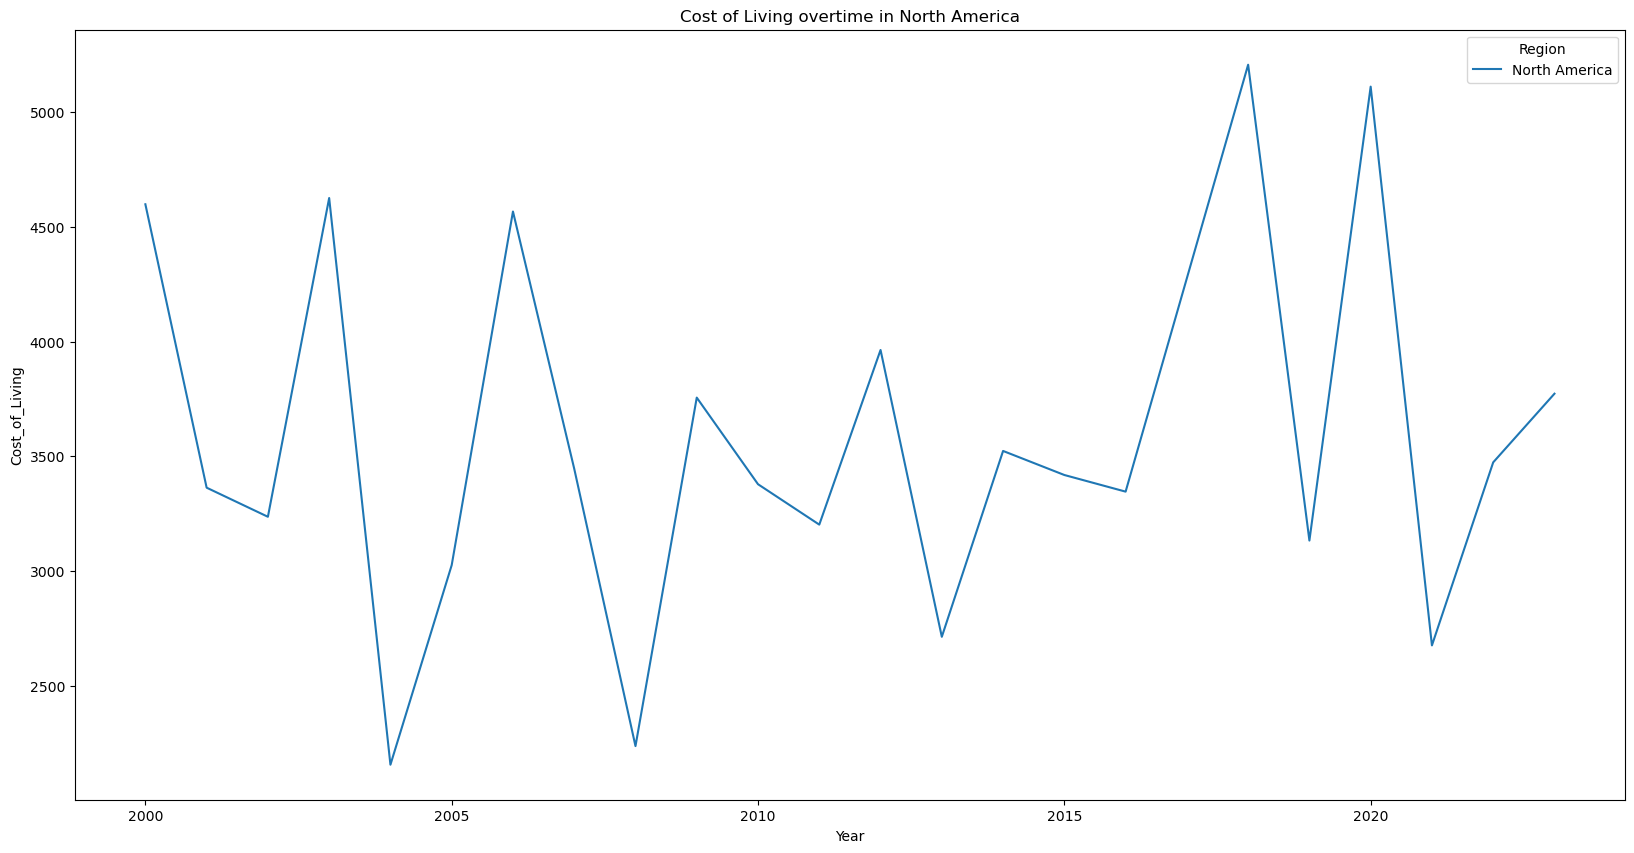

In [38]:
# With a focus on North America

# Average Monthly Income over time in the North America
plt.figure(figsize=(20, 10))
NORTH_ECON = world_col[world_col["Region"] == "North America"]
sns.lineplot(data=NORTH_ECON, x="Year", y="Average_Monthly_Income", hue="Region", errorbar=None)
plt.title("Average Monthly Income overtime in North America")
plt.show()
plt.close()

# Cost of living over time in the North America
plt.figure(figsize=(20, 10))
NORTH_ECON = world_col[world_col["Region"] == "North America"]
sns.lineplot(data=NORTH_ECON, x="Year", y="Cost_of_Living", hue="Region", errorbar=None)
plt.title("Cost of Living overtime in North America")
plt.show()
plt.close()



In [ ]:
# Pearson Correlation Coefficient of North America
PCC_USA_COLxAMI = np.corrcoef(NORTH_ECON['Cost_of_Living'], NORTH_ECON['Average_Monthly_Income'])[0,1]
print("The correlation between Cost of Living and Average Monthly Income in the North America is", PCC_USA_COLxAMI)

The correlation between Cost of Living and Average Monthly Income in the North America is -0.0462315029214801


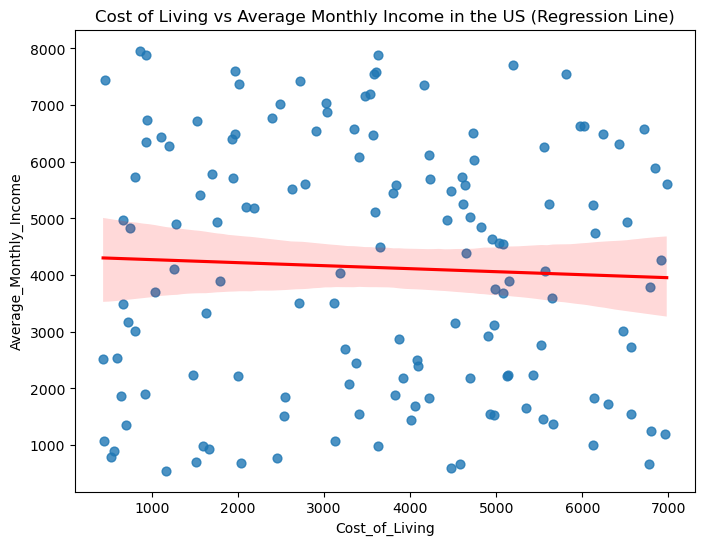

In [40]:
# Regression plot of Cost of Living vs Average Monthly Income in the North America
plt.figure(figsize=(8, 6))
sns.regplot(data=NORTH_ECON, x='Cost_of_Living', y='Average_Monthly_Income', scatter_kws={'s':40}, line_kws={'color':'red'})
plt.title("Cost of Living vs Average Monthly Income in the US (Regression Line)")
plt.show()

#### With all this information the Pearson Correlation Coefficient, and our regression plot suggest that there is no meaningful linear relationship between the Cost of Living and Average Monthly Income in North America. 
#### But... this is North America. Lets get more specific!

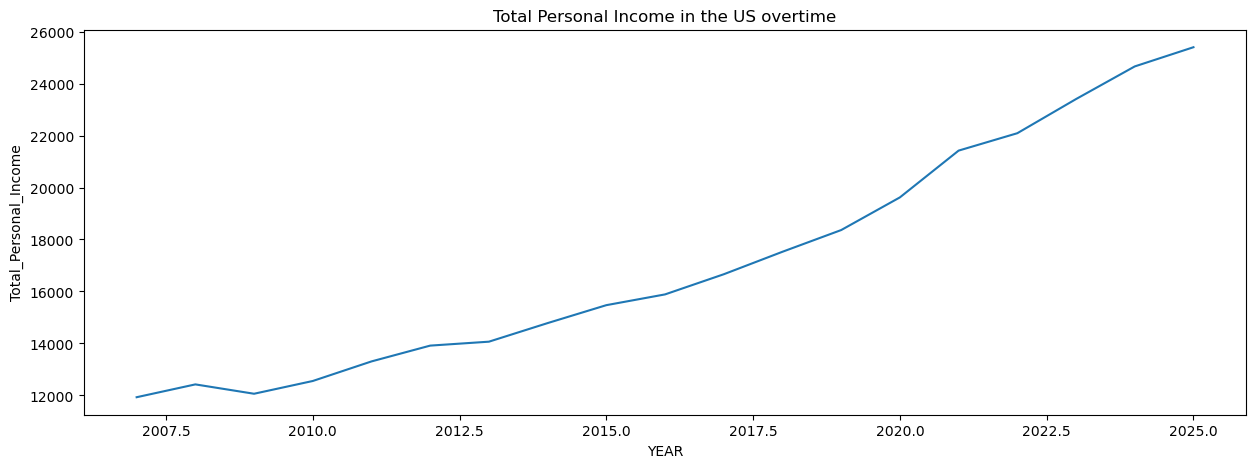

In [52]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=us_econ, x="YEAR", y="Total_Personal_Income",errorbar=None)
plt.title("Total Personal Income in the US overtime")
plt.show()
plt.close()

#### How about American income in comparison to costs of living around the world?

In [ ]:
us_econ = us_econ.rename(columns={"YEAR": "Year"})
us_econm0-o-op["Total_Personal_Income"]



us_econ = us_econ.rename(columns={"YEAR": "Year"})
merged_data = pd.merge(us_econ, world_col, on="Year", how="inner") # By the year

#NORTH_ECON = world_col[world_col["Region"] == "North America"] 
merged_data = merged_data[merged_data["Region"] == "Asia"]

merged_data = merged_data.drop(columns=["DATE", "MONTH", "MONTH_NAME", "QUARTER"])
merged_data.head()

,Unnamed: 0,Year,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income,Country,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,0,2007,10200.4,39803,11181.0,11647.1,Japan,998.72,3253.41,29.10,8.38,23.41,6.25,14.16,18.47,Asia
3,0,2007,10200.4,39803,11181.0,11647.1,India,1822.90,6975.80,42.44,29.03,8.67,7.92,7.00,14.66,Asia
7,0,2007,10200.4,39803,11181.0,11647.1,Japan,3063.63,5717.42,31.04,12.63,6.78,19.96,6.01,7.14,Asia
11,0,2007,10200.4,39803,11181.0,11647.1,India,7984.51,1905.33,45.50,7.53,19.70,7.16,12.13,11.88,Asia
13,0,2007,10200.4,39803,11181.0,11647.1,Japan,3108.57,5957.42,36.22,8.69,27.62,18.63,3.75,9.69,Asia


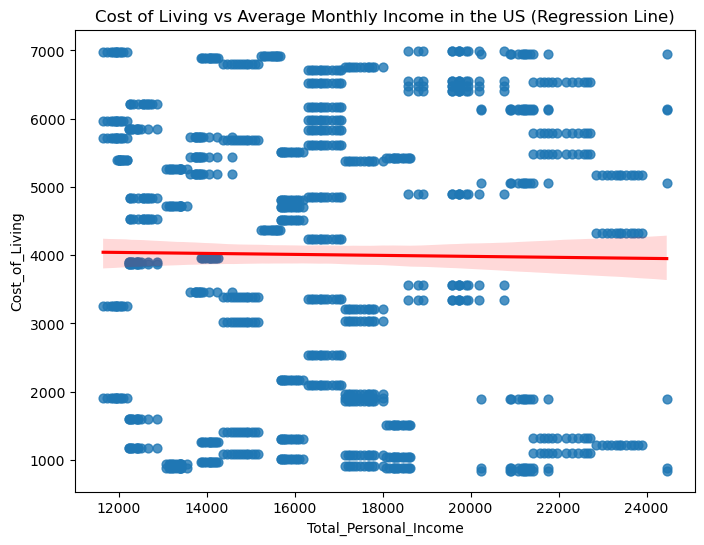

In [92]:
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_data, x='Total_Personal_Income', y='Cost_of_Living', scatter_kws={'s':40}, line_kws={'color':'red'})
plt.title("Cost of Living vs Average Monthly Income in the US (Regression Line)")
plt.show()

In [93]:
# Pearson Correlation Coefficient of North America
PCC_NORTH_COLxTPI = np.corrcoef(merged_data['Cost_of_Living'], merged_data['Total_Personal_Income'])[0,1]
print("The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is", PCC_NORTH_COLxTPI)

SOUTH_data = merged_data[merged_data["Region"] == "South America"]
PCC_SOUTH_COLxTPI = np.corrcoef(merged_data['Cost_of_Living'], merged_data['Total_Personal_Income'])[0,1]
print("The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is", PCC_SOUTH_COLxTPI)

EURO_data = merged_data[merged_data["Region"] == "Europe"]
PCC_EURO_COLxTPI = np.corrcoef(merged_data['Cost_of_Living'], merged_data['Total_Personal_Income'])[0,1]
print("The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is", PCC_EURO_COLxTPI)

ASIA_data = merged_data[merged_data["Region"] == "Asia"]
PCC_ASIA_COLxTPI = np.corrcoef(merged_data['Cost_of_Living'], merged_data['Total_Personal_Income'])[0,1]
print("The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is", PCC_ASIA_COLxTPI)

AFRICA_data = merged_data[merged_data["Region"] == "Africa"]
PCC_AFRICA_COLxTPI = np.corrcoef(merged_data['Cost_of_Living'], merged_data['Total_Personal_Income'])[0,1]
print("The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is", PCC_AFRICA_COLxTPI)

AUSTRALIA_data = merged_data[merged_data["Region"] == "Oceania"]
PCC_AUSTRALIA_COLxTPI = np.corrcoef(merged_data['Cost_of_Living'], merged_data['Total_Personal_Income'])[0,1]
print("The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is", PCC_AUSTRALIA_COLxTPI)


The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is -0.011537238117883541
The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is -0.011537238117883541
The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is -0.011537238117883541
The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is -0.011537238117883541
The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is -0.011537238117883541
The correlation between Cost of Living in North America and Average Monthly Income in the United Satates is -0.011537238117883541
